<a href="https://colab.research.google.com/github/urgetolearn/App-Review/blob/main/AppReview(Spotify).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
from google.colab import files
uploaded = files.upload()


Saving reviews.csv to reviews.csv


In [7]:
import pandas as pd
df = pd.read_csv("reviews.csv")
df.head()


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [8]:
import pandas as pd

# Replace with the actual file name you uploaded
df = pd.read_csv("reviews.csv")

# Peek into the data
df.head()

# Check missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


,0
Time_submitted,0
Review,0
Rating,0
Total_thumbsup,0
Reply,61378


In [11]:
df.head()
df.columns


Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [12]:
# Drop missing rows
df = df.dropna(subset=['Review', 'Rating'])

# Keep only Review + Rating for ML
df = df[['Review', 'Rating']]
df.head()


,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [13]:
def get_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating <= 2:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Rating'].apply(get_sentiment)
df.head()


,Review,Rating,Sentiment
0,"Great music service, the audio is high quality...",5,Positive
1,Please ignore previous negative rating. This a...,5,Positive
2,"This pop-up ""Get the best Spotify experience o...",4,Positive
3,Really buggy and terrible to use as of recently,1,Negative
4,Dear Spotify why do I get songs that I didn't ...,1,Negative


In [14]:
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,29937
Negative,24771
Neutral,6886


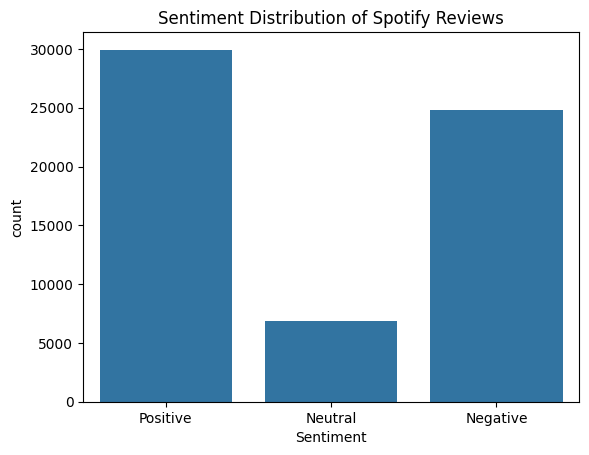

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df, order=['Positive','Neutral','Negative'])
plt.title("Sentiment Distribution of Spotify Reviews")
plt.show()


              precision    recall  f1-score   support

    Negative       0.87      0.89      0.88      4971
    Positive       0.91      0.89      0.90      5971

    accuracy                           0.89     10942
   macro avg       0.89      0.89      0.89     10942
weighted avg       0.89      0.89      0.89     10942



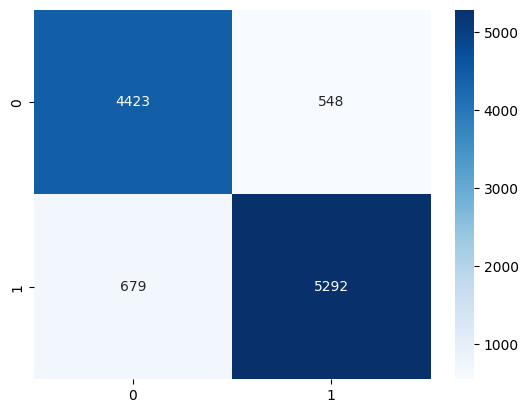

In [16]:
df_binary = df[df['Sentiment'] != 'Neutral']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df_binary['Review']
y = df_binary['Sentiment']

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()


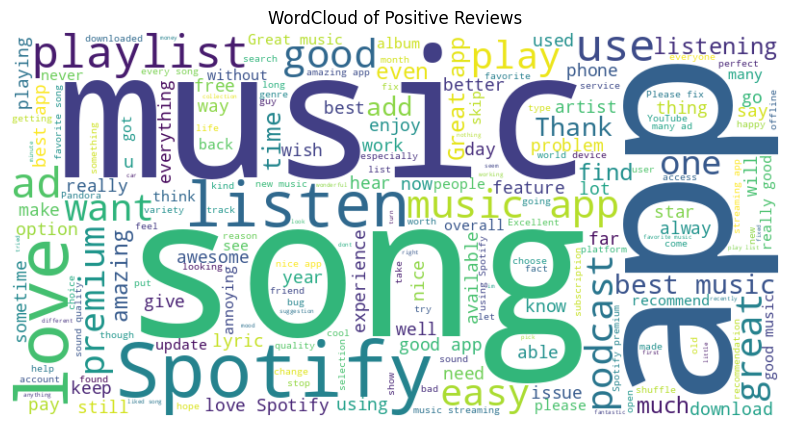

In [17]:
from wordcloud import WordCloud

# Positive Reviews WordCloud
text_pos = " ".join(review for review in df[df.Sentiment == "Positive"].Review.astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_pos)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Positive Reviews")
plt.show()
